# 1. Import and install Dependencies

In [1]:
pip install opencv-python ##webcam'e erişim



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
print(cv2.__version__)


4.8.1


In [3]:
pip install mediapipe



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2 #python sürümü
import numpy as np
import os
from matplotlib import pyplot as plt #veri görselleştirme
import time
import mediapipe as mp

In [8]:
##pip install tensorflow==2.4.1


# 2. Keypoints using MP Holistic

In [9]:
mp_holistic = mp.solutions.holistic # Holistic modeli getirir/ tespit(detection) için kullanılır
mp_drawing = mp.solutions.drawing_utils # Drawing utilities/ tespiti çizme

In [10]:
def mediapipe_detection(image, model): #fonksiyon
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB /MediaPipe, RGB renk uzayını kullanır
    image.flags.writeable = False                  # Image is no longer writeable/mediapipe ister
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand
    
    ##Landmarkları birleştirir 

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [13]:
mp.solutions.holistic

<module 'mediapipe.python.solutions.holistic' from '/Users/aleynaerdeve/anaconda3/lib/python3.11/site-packages/mediapipe/python/solutions/holistic.py'>

In [14]:
left_hand_landmarks = mp_holistic.HAND_CONNECTIONS
print("Sol El Landmark'ları:", left_hand_landmarks) ### 


Sol El Landmark'ları: frozenset({(3, 4), (0, 5), (17, 18), (0, 17), (13, 14), (13, 17), (18, 19), (5, 6), (5, 9), (14, 15), (0, 1), (9, 10), (1, 2), (9, 13), (10, 11), (19, 20), (6, 7), (15, 16), (2, 3), (11, 12), (7, 8)})


In [15]:
###mp_holistic.POSE_CONNECTIONS

In [16]:
cap = cv2.VideoCapture(0) #değişken tanımı
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #minimum güvenlik eşiği=%50 den düşükse göz ardı 
    while cap.isOpened(): ##her frame için bir loop video oluşturur ##computervision video

        # Read feed
        ret, frame = cap.read() #frame i okuma
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic) #vücut için model
        print(results) 
        
         # Draw landmarks
        draw_styled_landmarks(image, results)


        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #q bas çık
            break
    cap.release()
    cv2.destroyAllWindows()

2024-01-07 21:23:09.084 python[18065:6268734] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1704651790.239489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
len(results.left_hand_landmarks.landmark) ##sol el için landmark sayısı


21

In [18]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [19]:
frame #extract ettiğimiz son frame

array([[[175, 183, 189],
        [174, 182, 188],
        [173, 181, 187],
        ...,
        [127, 142, 149],
        [126, 140, 148],
        [128, 143, 150]],

       [[175, 183, 189],
        [174, 182, 188],
        [178, 186, 191],
        ...,
        [129, 144, 151],
        [131, 145, 152],
        [131, 145, 152]],

       [[179, 187, 193],
        [169, 177, 183],
        [180, 188, 194],
        ...,
        [129, 144, 151],
        [131, 145, 152],
        [133, 147, 155]],

       ...,

       [[110, 110, 141],
        [112, 112, 144],
        [111, 111, 142],
        ...,
        [ 74,  76,  80],
        [ 73,  75,  79],
        [ 72,  74,  78]],

       [[112, 112, 144],
        [113, 113, 145],
        [110, 110, 141],
        ...,
        [ 67,  69,  73],
        [ 70,  71,  76],
        [ 80,  82,  86]],

       [[113, 113, 145],
        [112, 112, 144],
        [108, 107, 139],
        ...,
        [ 72,  74,  78],
        [ 73,  75,  79],
        [ 80,  82,  86]]

In [20]:
draw_landmarks(frame, results)
#resultlar mediapipe detect modelden gelir// orijinal görüntü üzerinde değişiklik yapılır


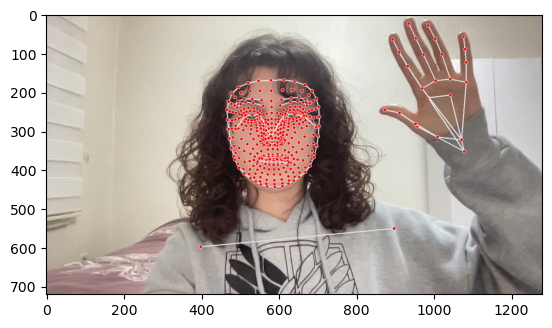

In [21]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
 ## son kare rengi düzeltilmiş

# 3. Extract Keypoint Values

In [22]:
len(results.pose_landmarks.landmark)

33

In [23]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [24]:
pose.shape

AttributeError: 'list' object has no attribute 'shape'

In [25]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [26]:
np.zeros(21*3).shape

(63,)

In [27]:
lh

array([ 8.38266969e-01,  4.49577034e-01,  2.66911314e-07,  7.89690077e-01,
        4.39390004e-01, -1.68173518e-02,  7.44817019e-01,  3.92132580e-01,
       -2.42724139e-02,  7.12842882e-01,  3.52852881e-01, -3.05882879e-02,
        6.82962716e-01,  3.41970414e-01, -3.74909677e-02,  7.58084238e-01,
        2.65406579e-01, -1.37457959e-02,  7.29184151e-01,  1.86337948e-01,
       -2.66585387e-02,  7.12008536e-01,  1.36172980e-01, -3.81572880e-02,
        6.98585331e-01,  9.09243375e-02, -4.73332070e-02,  7.85251319e-01,
        2.38050923e-01, -1.70626696e-02,  7.61517763e-01,  1.45648926e-01,
       -2.83122491e-02,  7.45850146e-01,  8.63143951e-02, -4.05775569e-02,
        7.31925964e-01,  3.41635942e-02, -5.01973890e-02,  8.15190971e-01,
        2.32647315e-01, -2.28296481e-02,  7.98241854e-01,  1.44017369e-01,
       -3.62688601e-02,  7.84890175e-01,  8.88112187e-02, -4.78203259e-02,
        7.71003425e-01,  4.04051542e-02, -5.65157831e-02,  8.47076714e-01,
        2.43404329e-01, -

In [28]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

IndentationError: unexpected indent (3987811915.py, line 2)

In [29]:
len(results.face_landmarks.landmark)

468

In [30]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [31]:
result_test = extract_keypoints(results)


In [32]:
result_test


array([ 0.45324597,  0.43653741, -0.92878616, ...,  0.        ,
        0.        ,  0.        ])

In [33]:
np.save('0', result_test)


In [40]:
np.load('0.npy')


array([ 0.45324597,  0.43653741, -0.92878616, ...,  0.        ,
        0.        ,  0.        ])

In [41]:
extract_keypoints(results).shape

(1662,)

# 4. Setup Folders for Collection

In [42]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou',])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [43]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [44]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [45]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                 # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1704652009.684492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1


In [46]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [47]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [48]:
label_map = {label:num for num, label in enumerate(actions)}


label_map = {label:num for num, label in enumerate(actions)}


In [49]:
label_map


{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [50]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [51]:
np.array(sequences).shape #90 video 30 frame 1662 keypoints 

(90, 30, 1662)

In [52]:
np.array(labels).shape

(90,)

In [53]:
X = np.array(sequences)


In [54]:
X.shape

(90, 30, 1662)

In [55]:
y = to_categorical(labels).astype(int)


In [56]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [58]:
X_test.shape


(5, 30, 1662)

In [59]:
y_test.shape


(5, 3)

# 7. Build and Train LSTM Neural Network

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [61]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [62]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [63]:
[actions.shape[0]]

[3]

In [64]:
res = [.7, 0.2, 0.1]


In [65]:
actions[np.argmax(res)]


'hello'

In [66]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [67]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 2s 30ms/step - loss: 1.4415 - categorical_accuracy: 0.2588
Epoch 2/2000
3/3 [==============================] - 0s 33ms/step - loss: 2.6342 - categorical_accuracy: 0.2471
Epoch 3/2000
3/3 [==============================] - 0s 34ms/step - loss: 5.3241 - categorical_accuracy: 0.2471
Epoch 4/2000
3/3 [==============================] - 0s 33ms/step - loss: 16.9269 - categorical_accuracy: 0.3882
Epoch 5/2000
3/3 [==============================] - 0s 33ms/step - loss: 5.9836 - categorical_accuracy: 0.3765
Epoch 6/2000
3/3 [==============================] - 0s 33ms/step - loss: 5.6869 - categorical_accuracy: 0.3412
Epoch 7/2000
3/3 [==============================] - 0s 34ms/step - loss: 3.6144 - categorical_accuracy: 0.3059
Epoch 8/2000
3/3 [==============================] - 0s 34ms/step - loss: 1.9608 - categorical_accuracy: 0.4118
Epoch 9/2000
3/3 [==============================] - 0s 31ms/step - loss: 2.0276 - categorical_accuracy: 0.3765


3/3 [==============================] - 0s 40ms/step - loss: 10.3401 - categorical_accuracy: 0.3529
Epoch 74/2000
3/3 [==============================] - 0s 42ms/step - loss: 8.5285 - categorical_accuracy: 0.3765
Epoch 75/2000
3/3 [==============================] - 0s 38ms/step - loss: 14.5443 - categorical_accuracy: 0.3294
Epoch 76/2000
3/3 [==============================] - 0s 41ms/step - loss: 13.6890 - categorical_accuracy: 0.3647
Epoch 77/2000
3/3 [==============================] - 0s 37ms/step - loss: 17.4426 - categorical_accuracy: 0.2824
Epoch 78/2000
3/3 [==============================] - 0s 36ms/step - loss: 5.1233 - categorical_accuracy: 0.4118
Epoch 79/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.5766 - categorical_accuracy: 0.3294
Epoch 80/2000
3/3 [==============================] - 0s 36ms/step - loss: 4.4810 - categorical_accuracy: 0.3176
Epoch 81/2000
3/3 [==============================] - 0s 35ms/step - loss: 2.8743 - categorical_accuracy: 0.2824
Ep

3/3 [==============================] - 0s 41ms/step - loss: 0.7001 - categorical_accuracy: 0.6706
Epoch 146/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.3972 - categorical_accuracy: 0.5647
Epoch 147/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.3140 - categorical_accuracy: 0.3529
Epoch 148/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.9493 - categorical_accuracy: 0.6588
Epoch 149/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.9919 - categorical_accuracy: 0.6118
Epoch 150/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.8154 - categorical_accuracy: 0.5882
Epoch 151/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.6422 - categorical_accuracy: 0.6353
Epoch 152/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.6825 - categorical_accuracy: 0.6706
Epoch 153/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.8224 - categorical_accuracy: 0.658

3/3 [==============================] - 0s 43ms/step - loss: 0.5979 - categorical_accuracy: 0.6941
Epoch 218/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.5525 - categorical_accuracy: 0.7059
Epoch 219/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.5742 - categorical_accuracy: 0.6353
Epoch 220/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.4364 - categorical_accuracy: 0.7765
Epoch 221/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4872 - categorical_accuracy: 0.7882
Epoch 222/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.4530 - categorical_accuracy: 0.7529
Epoch 223/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4612 - categorical_accuracy: 0.7529
Epoch 224/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.5472 - categorical_accuracy: 0.7176
Epoch 225/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.3289 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 39ms/step - loss: 0.2936 - categorical_accuracy: 0.8824
Epoch 290/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.2767 - categorical_accuracy: 0.9176
Epoch 291/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.2668 - categorical_accuracy: 0.9059
Epoch 292/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2565 - categorical_accuracy: 0.9294
Epoch 293/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2387 - categorical_accuracy: 0.8941
Epoch 294/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.2617 - categorical_accuracy: 0.8824
Epoch 295/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2258 - categorical_accuracy: 0.9294
Epoch 296/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.2085 - categorical_accuracy: 0.9176
Epoch 297/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.2142 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 41ms/step - loss: 0.2662 - categorical_accuracy: 0.8588
Epoch 362/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2714 - categorical_accuracy: 0.8471
Epoch 363/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2259 - categorical_accuracy: 0.8706
Epoch 364/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.2911 - categorical_accuracy: 0.8235
Epoch 365/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2937 - categorical_accuracy: 0.8471
Epoch 366/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.2731 - categorical_accuracy: 0.8588
Epoch 367/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2883 - categorical_accuracy: 0.8118
Epoch 368/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4085 - categorical_accuracy: 0.8471
Epoch 369/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.3560 - categorical_accuracy: 0.800

3/3 [==============================] - 0s 43ms/step - loss: 0.1391 - categorical_accuracy: 0.9647
Epoch 434/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1057 - categorical_accuracy: 0.9765
Epoch 435/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1218 - categorical_accuracy: 0.9529
Epoch 436/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0812 - categorical_accuracy: 0.9765
Epoch 437/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1269 - categorical_accuracy: 0.9294
Epoch 438/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1450 - categorical_accuracy: 0.9412
Epoch 439/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1650 - categorical_accuracy: 0.9294
Epoch 440/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.6652 - categorical_accuracy: 0.7765
Epoch 441/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0491 - categorical_accuracy: 0.717

3/3 [==============================] - 0s 39ms/step - loss: 0.6496 - categorical_accuracy: 0.5765
Epoch 506/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5536 - categorical_accuracy: 0.6941
Epoch 507/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.5782 - categorical_accuracy: 0.6000
Epoch 508/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.5383 - categorical_accuracy: 0.6118
Epoch 509/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.5696 - categorical_accuracy: 0.6824
Epoch 510/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.5224 - categorical_accuracy: 0.6471
Epoch 511/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.5260 - categorical_accuracy: 0.6941
Epoch 512/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.4915 - categorical_accuracy: 0.6824
Epoch 513/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4782 - categorical_accuracy: 0.705

3/3 [==============================] - 0s 41ms/step - loss: 0.4506 - categorical_accuracy: 0.7412
Epoch 578/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4590 - categorical_accuracy: 0.6824
Epoch 579/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.4732 - categorical_accuracy: 0.7176
Epoch 580/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.5141 - categorical_accuracy: 0.6588
Epoch 581/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4356 - categorical_accuracy: 0.7529
Epoch 582/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4413 - categorical_accuracy: 0.7647
Epoch 583/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4379 - categorical_accuracy: 0.7647
Epoch 584/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.4458 - categorical_accuracy: 0.7529
Epoch 585/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4437 - categorical_accuracy: 0.741

3/3 [==============================] - 0s 39ms/step - loss: 0.5399 - categorical_accuracy: 0.7176
Epoch 650/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.5721 - categorical_accuracy: 0.7059
Epoch 651/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5153 - categorical_accuracy: 0.7294
Epoch 652/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4752 - categorical_accuracy: 0.7529
Epoch 653/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4097 - categorical_accuracy: 0.7882
Epoch 654/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.4188 - categorical_accuracy: 0.7412
Epoch 655/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4232 - categorical_accuracy: 0.8000
Epoch 656/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4113 - categorical_accuracy: 0.7529
Epoch 657/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4071 - categorical_accuracy: 0.800

3/3 [==============================] - 0s 44ms/step - loss: 0.5136 - categorical_accuracy: 0.7294
Epoch 722/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4503 - categorical_accuracy: 0.6824
Epoch 723/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.4800 - categorical_accuracy: 0.6824
Epoch 724/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.5496 - categorical_accuracy: 0.7059
Epoch 725/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5803 - categorical_accuracy: 0.6706
Epoch 726/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4597 - categorical_accuracy: 0.7647
Epoch 727/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4282 - categorical_accuracy: 0.7882
Epoch 728/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4574 - categorical_accuracy: 0.7765
Epoch 729/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4650 - categorical_accuracy: 0.752

3/3 [==============================] - 0s 54ms/step - loss: 0.4966 - categorical_accuracy: 0.7529
Epoch 794/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4659 - categorical_accuracy: 0.7176
Epoch 795/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.6082 - categorical_accuracy: 0.7294
Epoch 796/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.6453 - categorical_accuracy: 0.6824
Epoch 797/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.5551 - categorical_accuracy: 0.7176
Epoch 798/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4093 - categorical_accuracy: 0.7294
Epoch 799/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.3665 - categorical_accuracy: 0.7765
Epoch 800/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.3309 - categorical_accuracy: 0.8353
Epoch 801/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.3034 - categorical_accuracy: 0.917

3/3 [==============================] - 0s 42ms/step - loss: 0.4306 - categorical_accuracy: 0.7765
Epoch 866/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4104 - categorical_accuracy: 0.7647
Epoch 867/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.4754 - categorical_accuracy: 0.7412
Epoch 868/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.5427 - categorical_accuracy: 0.6588
Epoch 869/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.4422 - categorical_accuracy: 0.7647
Epoch 870/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.4382 - categorical_accuracy: 0.7059
Epoch 871/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.4506 - categorical_accuracy: 0.7882
Epoch 872/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4100 - categorical_accuracy: 0.7412
Epoch 873/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4042 - categorical_accuracy: 0.764

3/3 [==============================] - 0s 44ms/step - loss: 0.3722 - categorical_accuracy: 0.7647
Epoch 938/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4012 - categorical_accuracy: 0.7765
Epoch 939/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3593 - categorical_accuracy: 0.8706
Epoch 940/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4224 - categorical_accuracy: 0.7882
Epoch 941/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4666 - categorical_accuracy: 0.7059
Epoch 942/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.5135 - categorical_accuracy: 0.7647
Epoch 943/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.5156 - categorical_accuracy: 0.7176
Epoch 944/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.4646 - categorical_accuracy: 0.7412
Epoch 945/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4031 - categorical_accuracy: 0.752

3/3 [==============================] - 0s 39ms/step - loss: 0.4646 - categorical_accuracy: 0.7882
Epoch 1010/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.5255 - categorical_accuracy: 0.6941
Epoch 1011/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.5548 - categorical_accuracy: 0.7529
Epoch 1012/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4530 - categorical_accuracy: 0.7059
Epoch 1013/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.3514 - categorical_accuracy: 0.8000
Epoch 1014/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4269 - categorical_accuracy: 0.6706
Epoch 1015/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.4030 - categorical_accuracy: 0.7647
Epoch 1016/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.3842 - categorical_accuracy: 0.7765
Epoch 1017/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.3391 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 0.3739 - categorical_accuracy: 0.8118
Epoch 1082/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4827 - categorical_accuracy: 0.7529
Epoch 1083/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.3925 - categorical_accuracy: 0.7529
Epoch 1084/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.5426 - categorical_accuracy: 0.7412
Epoch 1085/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4479 - categorical_accuracy: 0.7529
Epoch 1086/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.5136 - categorical_accuracy: 0.6941
Epoch 1087/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.3989 - categorical_accuracy: 0.7765
Epoch 1088/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4055 - categorical_accuracy: 0.8235
Epoch 1089/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3382 - categorical_accurac

3/3 [==============================] - 0s 43ms/step - loss: 0.5157 - categorical_accuracy: 0.7176
Epoch 1154/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.4234 - categorical_accuracy: 0.8118
Epoch 1155/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4574 - categorical_accuracy: 0.6706
Epoch 1156/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.6774 - categorical_accuracy: 0.7412
Epoch 1157/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.5272 - categorical_accuracy: 0.7647
Epoch 1158/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4324 - categorical_accuracy: 0.8000
Epoch 1159/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3833 - categorical_accuracy: 0.7529
Epoch 1160/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4152 - categorical_accuracy: 0.7765
Epoch 1161/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.3867 - categorical_accurac

3/3 [==============================] - 0s 42ms/step - loss: 0.2253 - categorical_accuracy: 0.8824
Epoch 1226/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4057 - categorical_accuracy: 0.7529
Epoch 1227/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.3553 - categorical_accuracy: 0.8235
Epoch 1228/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.3768 - categorical_accuracy: 0.7529
Epoch 1229/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.3178 - categorical_accuracy: 0.8235
Epoch 1230/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2579 - categorical_accuracy: 0.8824
Epoch 1231/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.2255 - categorical_accuracy: 0.9059
Epoch 1232/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.2244 - categorical_accuracy: 0.8824
Epoch 1233/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.2632 - categorical_accurac

3/3 [==============================] - 0s 49ms/step - loss: 0.4359 - categorical_accuracy: 0.7882
Epoch 1298/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.3904 - categorical_accuracy: 0.8118
Epoch 1299/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3075 - categorical_accuracy: 0.8235
Epoch 1300/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3825 - categorical_accuracy: 0.8235
Epoch 1301/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.3180 - categorical_accuracy: 0.8235
Epoch 1302/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.2704 - categorical_accuracy: 0.8706
Epoch 1303/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.2447 - categorical_accuracy: 0.9059
Epoch 1304/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3086 - categorical_accuracy: 0.8000
Epoch 1305/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2432 - categorical_accurac

3/3 [==============================] - 0s 38ms/step - loss: 0.2067 - categorical_accuracy: 0.8706
Epoch 1370/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1908 - categorical_accuracy: 0.9059
Epoch 1371/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1686 - categorical_accuracy: 0.9176
Epoch 1372/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1278 - categorical_accuracy: 0.9765
Epoch 1373/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1308 - categorical_accuracy: 0.9647
Epoch 1374/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.1308 - categorical_accuracy: 0.9294
Epoch 1375/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.2201 - categorical_accuracy: 0.8824
Epoch 1376/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1519 - categorical_accuracy: 0.9412
Epoch 1377/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.2464 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 0.1024 - categorical_accuracy: 0.9765
Epoch 1442/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1453 - categorical_accuracy: 0.9294
Epoch 1443/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0810 - categorical_accuracy: 0.9882
Epoch 1444/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0799 - categorical_accuracy: 0.9765
Epoch 1445/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1612 - categorical_accuracy: 0.9059
Epoch 1446/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1524 - categorical_accuracy: 0.9294
Epoch 1447/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1095 - categorical_accuracy: 0.9529
Epoch 1448/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1592 - categorical_accuracy: 0.9294
Epoch 1449/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1942 - categorical_accurac

3/3 [==============================] - 0s 38ms/step - loss: 0.1756 - categorical_accuracy: 0.9412
Epoch 1514/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2278 - categorical_accuracy: 0.9176
Epoch 1515/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1654 - categorical_accuracy: 0.8941
Epoch 1516/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2547 - categorical_accuracy: 0.9059
Epoch 1517/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.2957 - categorical_accuracy: 0.8353
Epoch 1518/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4341 - categorical_accuracy: 0.8824
Epoch 1519/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.2001 - categorical_accuracy: 0.9059
Epoch 1520/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1982 - categorical_accuracy: 0.9176
Epoch 1521/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4990 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 0.1361 - categorical_accuracy: 0.9176
Epoch 1586/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2458 - categorical_accuracy: 0.9059
Epoch 1587/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4876 - categorical_accuracy: 0.8588
Epoch 1588/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.6944 - categorical_accuracy: 0.7882
Epoch 1589/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.6400 - categorical_accuracy: 0.7882
Epoch 1590/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.5621 - categorical_accuracy: 0.8118
Epoch 1591/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.6890 - categorical_accuracy: 0.8000
Epoch 1592/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.3396 - categorical_accuracy: 0.8941
Epoch 1593/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1561 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 0.0551 - categorical_accuracy: 0.9882
Epoch 1658/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0272 - categorical_accuracy: 1.0000
Epoch 1659/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0259 - categorical_accuracy: 0.9882
Epoch 1660/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0299 - categorical_accuracy: 0.9882
Epoch 1661/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.0250 - categorical_accuracy: 1.0000
Epoch 1662/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0293 - categorical_accuracy: 0.9882
Epoch 1663/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0251 - categorical_accuracy: 1.0000
Epoch 1664/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0246 - categorical_accuracy: 0.9882
Epoch 1665/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0214 - categorical_accurac

3/3 [==============================] - 0s 38ms/step - loss: 0.0998 - categorical_accuracy: 0.9765
Epoch 1730/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1206 - categorical_accuracy: 0.9647
Epoch 1731/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1163 - categorical_accuracy: 0.9412
Epoch 1732/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1363 - categorical_accuracy: 0.9294
Epoch 1733/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0498 - categorical_accuracy: 0.9882
Epoch 1734/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0861 - categorical_accuracy: 0.9529
Epoch 1735/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0945 - categorical_accuracy: 0.9529
Epoch 1736/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0257 - categorical_accuracy: 0.9882
Epoch 1737/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0262 - categorical_accurac

3/3 [==============================] - 0s 40ms/step - loss: 0.3188 - categorical_accuracy: 0.8941
Epoch 1802/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.7213 - categorical_accuracy: 0.7176
Epoch 1803/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.7073 - categorical_accuracy: 0.6824
Epoch 1804/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2808 - categorical_accuracy: 0.9176
Epoch 1805/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1742 - categorical_accuracy: 0.9176
Epoch 1806/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.3881 - categorical_accuracy: 0.8588
Epoch 1807/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4574 - categorical_accuracy: 0.8471
Epoch 1808/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.4303 - categorical_accuracy: 0.8118
Epoch 1809/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2492 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 0.0367 - categorical_accuracy: 0.9882
Epoch 1874/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.3174 - categorical_accuracy: 0.8941
Epoch 1875/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1121 - categorical_accuracy: 0.9529
Epoch 1876/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0781 - categorical_accuracy: 0.9765
Epoch 1877/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0462 - categorical_accuracy: 1.0000
Epoch 1878/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0617 - categorical_accuracy: 0.9765
Epoch 1879/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0633 - categorical_accuracy: 0.9765
Epoch 1880/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1098 - categorical_accuracy: 0.9529
Epoch 1881/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1227 - categorical_accurac

3/3 [==============================] - 0s 38ms/step - loss: 0.1180 - categorical_accuracy: 0.9529
Epoch 1946/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1390 - categorical_accuracy: 0.9412
Epoch 1947/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1875 - categorical_accuracy: 0.9294
Epoch 1948/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2525 - categorical_accuracy: 0.8941
Epoch 1949/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1877 - categorical_accuracy: 0.9176
Epoch 1950/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0914 - categorical_accuracy: 0.9647
Epoch 1951/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1091 - categorical_accuracy: 0.9765
Epoch 1952/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1513 - categorical_accuracy: 0.9294
Epoch 1953/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1607 - categorical_accurac

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

# 8. Make Predictions

In [69]:
res = model.predict(X_test)


1/1 [==============================] - 0s 219ms/step


In [70]:
actions[np.argmax(res[4])]


'iloveyou'

In [71]:
actions[np.argmax(y_test[4])]


'iloveyou'

# 9. Save Weights

In [72]:
model.save('action.h5')


/Users/aleynaerdeve/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
model.load_weights('action.h5')


# 10. Evaluation using Confusion Matrix and Accuracy

In [81]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [86]:
yhat = model.predict(X_train)


3/3 [==============================] - 0s 12ms/step


In [87]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [88]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[55,  0],
        [ 1, 29]],

       [[57,  0],
        [ 0, 28]],

       [[57,  1],
        [ 0, 27]]])

In [89]:
accuracy_score(ytrue, yhat)

0.9882352941176471

# 11. Test in Real Time

In [90]:
from scipy import stats


In [91]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

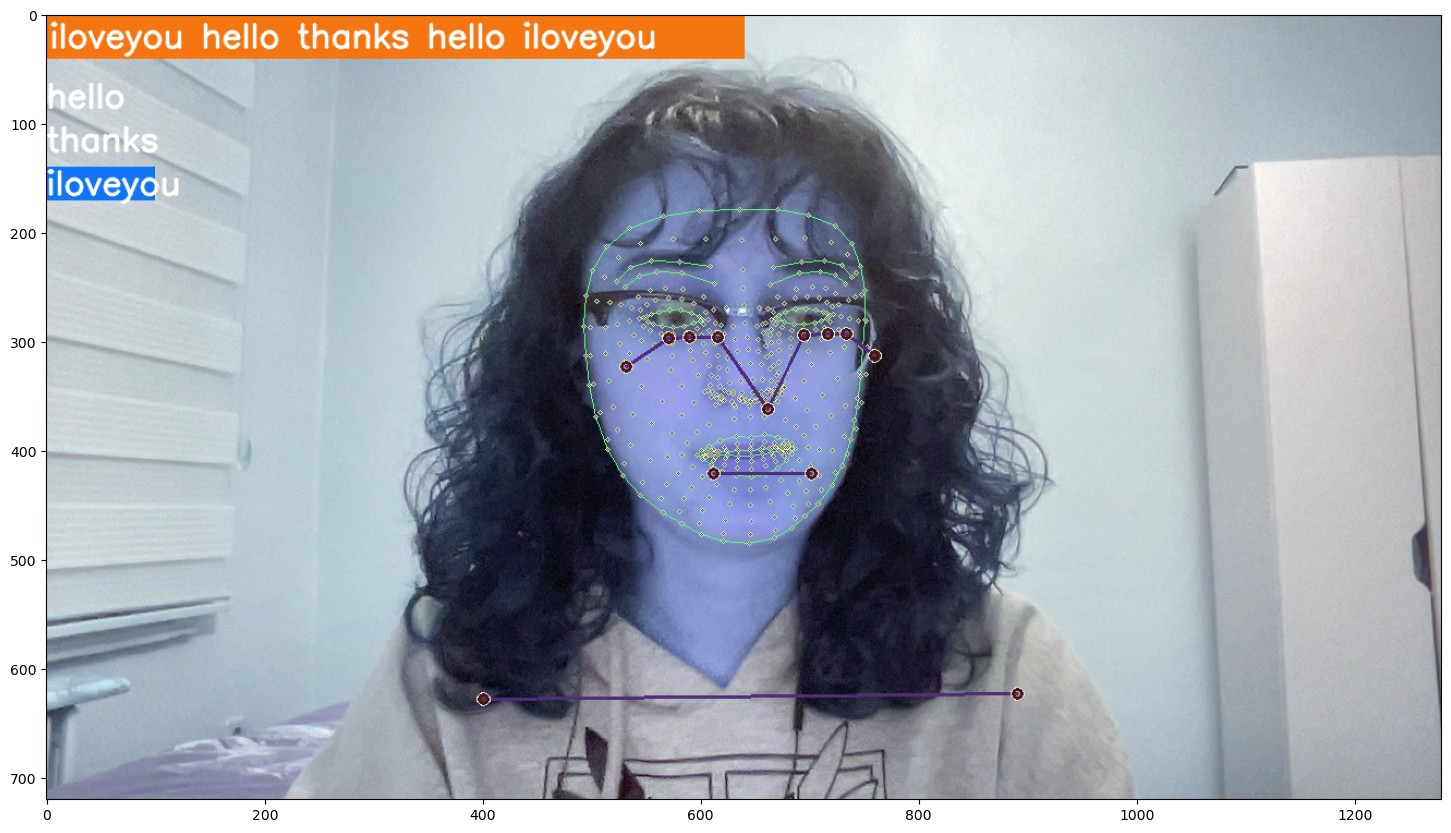

In [94]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [100]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1704655788.061973       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 12ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'media

1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapip

1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 11ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapip

model.predict(np.expand_dims(X_test[0], axis=0))


In [101]:
cap.release()
cv2.destroyAllWindows()

In [102]:
res[np.argmax(res)] > threshold


True

In [103]:
(num_sequences,30,1662)


NameError: name 'num_sequences' is not defined

In [104]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 17ms/step


array([[0., 1., 0.]], dtype=float32)

In [105]:
np.expand_dims(X_test[0], axis=0).shape

(1, 30, 1662)

In [238]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [239]:
res[np.argmax(res)] > threshold


True

In [240]:
print(len(res), len(actions), len(colors))


5 5 5
